In [ ]:
from google.colab import files  #loading data from local docs
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    df_cod = pd.read_csv(filename)
    print(f"Se ha cargado el archivo '{filename}'")

Saving cod_mobile.csv to cod_mobile (3).csv
Se ha cargado el archivo 'cod_mobile (3).csv'


In [ ]:
pd.set_option('display.max_columns', None)
df_cod.head()

,user name,date,Game Mode,Kills,Damage,Survival Time,Rescue,Distance traveled,Skill Uses,Preferred Skill,Preferred Weapon 1,Preferred Weapon 2,Arsenal,Accuracy,Head shot,Earned Rank XP,Earned XP,High Tier,Final Position,Total Groups,Total players
0,dayiszc,20/04/2024,Squad,3,839,15:29:00,0,4422,1,Rewind,M4,Bazzoca FHJ,1,"25,7%","0,0%",55,12896,1,1,26,100
1,dayiszc,20/04/2024,Squad,3,585,14:23:00,0,4147,4,Rewind,M4,Bazzoca FHJ,1,"24,3%","0,0%",18,9563,0,6,26,100
2,dayiszc,20/04/2024,Single,9,1765,19:24:00,0,4296,4,Rewind,M4,Bazzoca FHJ,1,"36,1%","11,1%",76,13969,0,1,100,100
3,dayiszc,21/04/2024,Single,6,1250,17:05:00,0,3512,2,Rewind,M4,Bazzoca FHJ,1,"44,8%","0,0%",57,13223,0,2,100,100
4,dayiszc,22/04/2024,Single,6,1365,13:53:00,0,3819,1,Rewind,M4,Bazzoca FHJ,0,"29,7%","16,7%",23,2356,0,16,100,100


In [ ]:
df_cod.columns = df_cod.columns.str.lower()  #standarize columns names
df_cod.columns = df_cod.columns.str.replace(' ', '_')
df_cod.head()

,user_name,date,game_mode,kills,damage,survival_time,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,preferred_weapon_2,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,final_position,total_groups,total_players
0,dayiszc,20/04/2024,Squad,3,839,15:29:00,0,4422,1,Rewind,M4,Bazzoca FHJ,1,"25,7%","0,0%",55,12896,1,1,26,100
1,dayiszc,20/04/2024,Squad,3,585,14:23:00,0,4147,4,Rewind,M4,Bazzoca FHJ,1,"24,3%","0,0%",18,9563,0,6,26,100
2,dayiszc,20/04/2024,Single,9,1765,19:24:00,0,4296,4,Rewind,M4,Bazzoca FHJ,1,"36,1%","11,1%",76,13969,0,1,100,100
3,dayiszc,21/04/2024,Single,6,1250,17:05:00,0,3512,2,Rewind,M4,Bazzoca FHJ,1,"44,8%","0,0%",57,13223,0,2,100,100
4,dayiszc,22/04/2024,Single,6,1365,13:53:00,0,3819,1,Rewind,M4,Bazzoca FHJ,0,"29,7%","16,7%",23,2356,0,16,100,100


In [ ]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_name           549 non-null    object
 1   date                549 non-null    object
 2   game_mode           549 non-null    object
 3   kills               549 non-null    int64 
 4   damage              549 non-null    int64 
 5   survival_time       549 non-null    object
 6   rescue              549 non-null    int64 
 7   distance_traveled   549 non-null    int64 
 8   skill_uses          549 non-null    int64 
 9   preferred_skill     549 non-null    object
 10  preferred_weapon_1  549 non-null    object
 11  preferred_weapon_2  549 non-null    object
 12  arsenal             549 non-null    int64 
 13  accuracy            549 non-null    object
 14  head_shot           549 non-null    object
 15  earned_rank_xp      549 non-null    int64 
 16  earned_xp           549 no

**Here we can observe that we have data types that need to be converted to the correct ones in order to work with our dataframe:**

date , Dtype: object ----> datetime64

survival_time, Dtype : object ----> timedelta64

accuracy, Dtype : object ----> float64

head_shot, Dtype : object ----> float64

In [ ]:
df_cod['date'] = pd.to_datetime(df_cod['date'], dayfirst=True)

# Verificar el tipo de datos de la columna 'fecha'
print(df_cod['date'].dtype)

datetime64[ns]


In [ ]:
#We need to convert the format of 'survival time' to make it suitable for working with correctly
#In this case, we have it in the format mm:ss: microseconds, and we will try to convert it to hh:mm:ss
def convert_to_hours_minutes_seconds(time):
    try:
        parts = time.split(':')
        if len(parts) == 2:  # If there are only minutes and seconds (without microseconds)
            minutes, seconds = parts
            hours = int(minutes) // 60
            minutes = int(minutes) % 60
            return f"{hours:02}:{minutes:02}:{seconds}"
        elif len(parts) == 3:  # If there are minutes, seconds, and microseconds
            minutes, seconds, microseconds = parts
            hours = int(minutes) // 60
            minutes = int(minutes) % 60
            return f"{hours:02}:{minutes:02}:{seconds}"
        else:
            return pd.NaT  # Return NaN if the format is not valid
    except ValueError:
        return pd.NaT  # Return NaN if there is an error in conversion

# Apply the function to each value in the 'survival_time' column
df_cod['survival_time'] = df_cod['survival_time'].apply(convert_to_hours_minutes_seconds)

# Verify the result
print(df_cod['survival_time'])

0      00:15:29
1      00:14:23
2      00:19:24
3      00:17:05
4      00:13:53
         ...   
544    00:19:15
545    00:19:07
546    00:18:06
547    00:17:18
548    00:02:56
Name: survival_time, Length: 549, dtype: object


In [ ]:
#When applying pd.to_timedelta() to the 'survival_time' column, pandas will interpret each value in the format hh:mm:ss as a time duration and convert the column to a timedelta type.
#This will allow to perform time operations and calculations on this column more efficiently.

df_cod['survival_time'] = pd.to_timedelta(df_cod['survival_time'])

print(df_cod['survival_time'].dtype)  #checking if it is converted to timedelta

timedelta64[ns]


In [ ]:
# Assuming 'accuracy' is the column containing precision values with the percentage symbol (%)
# Remove the percentage symbol and convert the column to float type

def convert_accuracy(value):
    try:
        accuracy_without_comma = value.replace(',', '.')  #Replace commas with decimal points
        return float(accuracy_without_comma.rstrip('%')) / 100.0
    except ValueError:
        return pd.NaT  #Return NaN if there is an error in conversion

# Apply the conversion function to each value in the 'accuracy' column
df_cod['accuracy'] = df_cod['accuracy'].apply(convert_accuracy)

In [ ]:
#Assuming 'head_shot' is the column containing head shot values with the percentage symbol (%)
#Remove the percentage symbol and convert the column to float type
def convert_head_shot(value):
    try:
        value_without_comma = value.replace(',', '.')  #Replace commas with decimal points
        return float(value_without_comma.rstrip('%')) / 100.0
    except ValueError:
        return pd.NaT  #Return NaN if there is an error in conversion

#Apply the conversion function to each value in the 'head_shot' column
df_cod['head_shot'] = df_cod['head_shot'].apply(convert_head_shot)

In [ ]:
df_cod.dtypes   #We can observe that we have successfully converted the dtypes.

user_name                      object
date                   datetime64[ns]
game_mode                      object
kills                           int64
damage                          int64
survival_time         timedelta64[ns]
rescue                          int64
distance_traveled               int64
skill_uses                      int64
preferred_skill                object
preferred_weapon_1             object
preferred_weapon_2             object
arsenal                         int64
accuracy                      float64
head_shot                     float64
earned_rank_xp                  int64
earned_xp                       int64
high_tier                       int64
final_position                  int64
total_groups                    int64
total_players                   int64
dtype: object

In [ ]:
df_cod.isnull().sum()

user_name             0
date                  0
game_mode             0
kills                 0
damage                0
survival_time         0
rescue                0
distance_traveled     0
skill_uses            0
preferred_skill       0
preferred_weapon_1    0
preferred_weapon_2    0
arsenal               0
accuracy              0
head_shot             0
earned_rank_xp        0
earned_xp             0
high_tier             0
final_position        0
total_groups          0
total_players         0
dtype: int64

In [ ]:
nulls = pd.DataFrame(df_cod.isna().sum()*100/len(df_cod), columns=['percentage'])  #We can also confirm the percentage of data that contains null or NaN values , show 0, It means that there are no null or NaN values
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage


In [ ]:
# Eliminar una columna específica del DataFrame
df_cod= df_cod.drop('total_players', axis=1)

In [ ]:
df_cod['relative_position'] = (df_cod['final_position'] / df_cod['total_groups']) * 100
print(df_cod.head())

  user_name       date game_mode  kills  damage   survival_time  rescue  \
0   dayiszc 2024-04-20     Squad      3     839 0 days 00:15:29       0   
1   dayiszc 2024-04-20     Squad      3     585 0 days 00:14:23       0   
2   dayiszc 2024-04-20    Single      9    1765 0 days 00:19:24       0   
3   dayiszc 2024-04-21    Single      6    1250 0 days 00:17:05       0   
4   dayiszc 2024-04-22    Single      6    1365 0 days 00:13:53       0   

   distance_traveled  skill_uses preferred_skill preferred_weapon_1  \
0               4422           1          Rewind                 M4   
1               4147           4          Rewind                 M4   
2               4296           4          Rewind                 M4   
3               3512           2          Rewind                 M4   
4               3819           1          Rewind                 M4   

  preferred_weapon_2  arsenal  accuracy  head_shot  earned_rank_xp  earned_xp  \
0        Bazzoca FHJ        1     0.257  

In [ ]:
df_cod.nunique()

user_name              12
date                   21
game_mode               3
kills                  16
damage                463
survival_time         336
rescue                  7
distance_traveled     519
skill_uses             19
preferred_skill        10
preferred_weapon_1      4
preferred_weapon_2      6
arsenal                 2
accuracy              329
head_shot              30
earned_rank_xp        159
earned_xp             513
high_tier               2
final_position         44
total_groups            8
relative_position      97
dtype: int64

In [ ]:
df_cod['survival_time_seconds'] = df_cod['survival_time'].dt.total_seconds()
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_name              549 non-null    object         
 1   date                   549 non-null    datetime64[ns] 
 2   game_mode              549 non-null    object         
 3   kills                  549 non-null    int64          
 4   damage                 549 non-null    int64          
 5   survival_time          549 non-null    timedelta64[ns]
 6   rescue                 549 non-null    int64          
 7   distance_traveled      549 non-null    int64          
 8   skill_uses             549 non-null    int64          
 9   preferred_skill        549 non-null    object         
 10  preferred_weapon_1     549 non-null    object         
 11  preferred_weapon_2     549 non-null    object         
 12  arsenal                549 non-null    int64      

In [ ]:
df_cod= df_cod.drop('survival_time', axis=1)

In [ ]:
df_cod['win_loss'] = df_cod['final_position'].apply(lambda x: 1 if x == 1 else 0)
df_cod.head()

,user_name,date,game_mode,kills,damage,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,preferred_weapon_2,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,final_position,total_groups,relative_position,survival_time_seconds,win_loss
0,dayiszc,2024-04-20,Squad,3,839,0,4422,1,Rewind,M4,Bazzoca FHJ,1,0.257,0.000,55,12896,1,1,26,3.846154,929.0,1
1,dayiszc,2024-04-20,Squad,3,585,0,4147,4,Rewind,M4,Bazzoca FHJ,1,0.243,0.000,18,9563,0,6,26,23.076923,863.0,0
2,dayiszc,2024-04-20,Single,9,1765,0,4296,4,Rewind,M4,Bazzoca FHJ,1,0.361,0.111,76,13969,0,1,100,1.000000,1164.0,1
3,dayiszc,2024-04-21,Single,6,1250,0,3512,2,Rewind,M4,Bazzoca FHJ,1,0.448,0.000,57,13223,0,2,100,2.000000,1025.0,0
4,dayiszc,2024-04-22,Single,6,1365,0,3819,1,Rewind,M4,Bazzoca FHJ,0,0.297,0.167,23,2356,0,16,100,16.000000,833.0,0


In [ ]:
new_columns_order = ['user_name', 'date', 'game_mode', 'kills',	'damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses',	'preferred_skill',	'preferred_weapon_1',	'preferred_weapon_2',	'arsenal',	'accuracy',	'head_shot',	'earned_rank_xp', 'earned_xp',	'high_tier', 'win_loss',	'final_position',	'total_groups',	'relative_position']
df_cod = df_cod[new_columns_order]
df_cod.head()

,user_name,date,game_mode,kills,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,preferred_weapon_2,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position
0,dayiszc,2024-04-20,Squad,3,839,929.0,0,4422,1,Rewind,M4,Bazzoca FHJ,1,0.257,0.000,55,12896,1,1,1,26,3.846154
1,dayiszc,2024-04-20,Squad,3,585,863.0,0,4147,4,Rewind,M4,Bazzoca FHJ,1,0.243,0.000,18,9563,0,0,6,26,23.076923
2,dayiszc,2024-04-20,Single,9,1765,1164.0,0,4296,4,Rewind,M4,Bazzoca FHJ,1,0.361,0.111,76,13969,0,1,1,100,1.000000
3,dayiszc,2024-04-21,Single,6,1250,1025.0,0,3512,2,Rewind,M4,Bazzoca FHJ,1,0.448,0.000,57,13223,0,0,2,100,2.000000
4,dayiszc,2024-04-22,Single,6,1365,833.0,0,3819,1,Rewind,M4,Bazzoca FHJ,0,0.297,0.167,23,2356,0,0,16,100,16.000000


In [ ]:
df_cod.isnull().sum()

user_name                0
date                     0
game_mode                0
kills                    0
damage                   0
survival_time_seconds    0
rescue                   0
distance_traveled        0
skill_uses               0
preferred_skill          0
preferred_weapon_1       0
preferred_weapon_2       0
arsenal                  0
accuracy                 0
head_shot                0
earned_rank_xp           0
earned_xp                0
high_tier                0
win_loss                 0
final_position           0
total_groups             0
relative_position        0
dtype: int64

In [ ]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_name              549 non-null    object        
 1   date                   549 non-null    datetime64[ns]
 2   game_mode              549 non-null    object        
 3   kills                  549 non-null    int64         
 4   damage                 549 non-null    int64         
 5   survival_time_seconds  549 non-null    float64       
 6   rescue                 549 non-null    int64         
 7   distance_traveled      549 non-null    int64         
 8   skill_uses             549 non-null    int64         
 9   preferred_skill        549 non-null    object        
 10  preferred_weapon_1     549 non-null    object        
 11  preferred_weapon_2     549 non-null    object        
 12  arsenal                549 non-null    int64         
 13  accur

In [ ]:
categoricals = df_cod.select_dtypes(include='object')  #Verify categoric variable
categoricals

,user_name,game_mode,preferred_skill,preferred_weapon_1,preferred_weapon_2
0,dayiszc,Squad,Rewind,M4,Bazzoca FHJ
1,dayiszc,Squad,Rewind,M4,Bazzoca FHJ
2,dayiszc,Single,Rewind,M4,Bazzoca FHJ
3,dayiszc,Single,Rewind,M4,Bazzoca FHJ
4,dayiszc,Single,Rewind,M4,Bazzoca FHJ
...,...,...,...,...,...
544,romanoski,Squad,Pumped,AK47,Bazzoca FHJ
545,romanoski,Squad,Pumped,AK47,Bazzoca FHJ
546,romanoski,Squad,Pumped,AK47,Bazzoca FHJ
547,romanoski,Squad,Pumped,AK47,Bazzoca FHJ


In [ ]:
numericals = df_cod.select_dtypes(include='number')  #Verify numeric variables
numericals

,kills,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position
0,3,839,929.0,0,4422,1,1,0.257,0.000,55,12896,1,1,1,26,3.846154
1,3,585,863.0,0,4147,4,1,0.243,0.000,18,9563,0,0,6,26,23.076923
2,9,1765,1164.0,0,4296,4,1,0.361,0.111,76,13969,0,1,1,100,1.000000
3,6,1250,1025.0,0,3512,2,1,0.448,0.000,57,13223,0,0,2,100,2.000000
4,6,1365,833.0,0,3819,1,0,0.297,0.167,23,2356,0,0,16,100,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,4,1476,1155.0,1,5002,4,1,0.173,0.000,73,6716,0,1,1,26,3.846154
545,2,794,1147.0,3,4118,6,0,0.235,1.000,33,6380,0,0,2,26,7.692308
546,5,1266,1086.0,0,6259,3,1,0.186,0.400,73,6490,0,1,1,25,4.000000
547,6,1547,1038.0,3,5530,10,1,0.192,0.000,76,6361,0,1,1,25,4.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Guardar el DataFrame como un archivo CSV en la ubicación especificada
ruta_guardado = '/content/drive/My Drive/final_cod_mobile.csv'
df_cod.to_csv(ruta_guardado, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_copy = df_cod.copy()

In [ ]:
correlation_matrix = numericals.corr()     #create the correlation matrix
correlation_matrix

,kills,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position
kills,1.000000,0.898158,0.522651,0.187084,0.504453,0.469681,0.598816,0.237848,0.033721,0.539900,0.500695,0.020928,0.430926,-0.359218,0.274359,-0.527422
damage,0.898158,1.000000,0.554546,0.283913,0.518268,0.466400,0.675542,0.230663,0.033805,0.512709,0.519689,0.002056,0.414378,-0.396977,0.101201,-0.532929
survival_time_seconds,0.522651,0.554546,1.000000,0.265058,0.748295,0.395469,0.588404,0.035456,0.070796,0.767152,0.717809,-0.079583,0.420510,-0.741025,-0.000700,-0.934292
rescue,0.187084,0.283913,0.265058,1.000000,0.252488,0.221875,0.261339,-0.011474,-0.006744,0.206655,0.201306,-0.035239,0.118488,-0.231949,-0.197393,-0.255234
distance_traveled,0.504453,0.518268,0.748295,0.252488,1.000000,0.485932,0.536835,-0.047099,0.082356,0.612884,0.613681,-0.033127,0.429657,-0.578080,-0.004356,-0.742998
skill_uses,0.469681,0.466400,0.395469,0.221875,0.485932,1.000000,0.339764,-0.060760,0.059851,0.370695,0.369039,0.043840,0.290029,-0.293681,0.045885,-0.373044
arsenal,0.598816,0.675542,0.588404,0.261339,0.536835,0.339764,1.000000,0.115989,0.057836,0.542752,0.526335,0.021710,0.355144,-0.442479,0.013304,-0.584481
accuracy,0.237848,0.230663,0.035456,-0.011474,-0.047099,-0.060760,0.115989,1.000000,-0.004876,0.019462,0.013158,-0.074715,-0.079885,0.008666,0.208024,-0.029996
head_shot,0.033721,0.033805,0.070796,-0.006744,0.082356,0.059851,0.057836,-0.004876,1.000000,0.029866,0.015815,-0.038046,-0.013186,-0.036447,0.041121,-0.060986
earned_rank_xp,0.539900,0.512709,0.767152,0.206655,0.612884,0.370695,0.542752,0.019462,0.029866,1.000000,0.641527,0.070216,0.535683,-0.572742,0.150153,-0.784817


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Ploting Numerical Variables

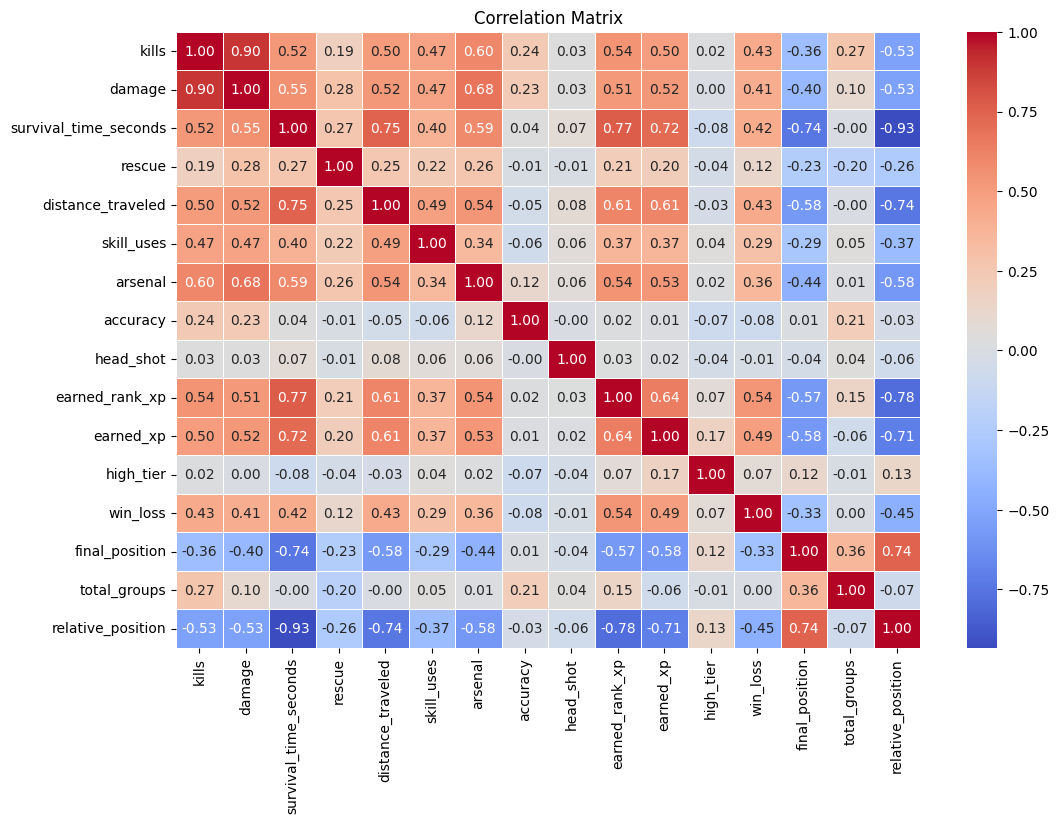

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

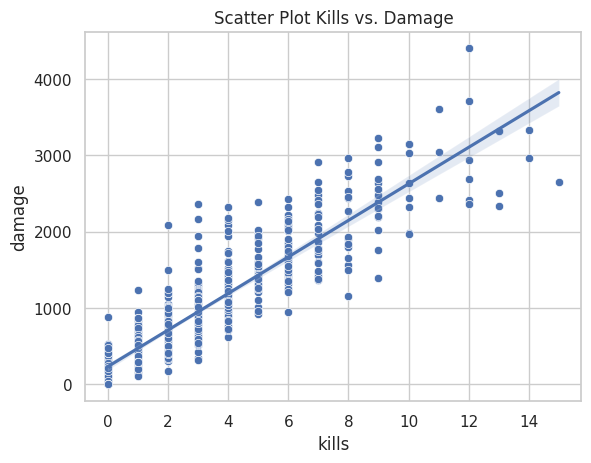

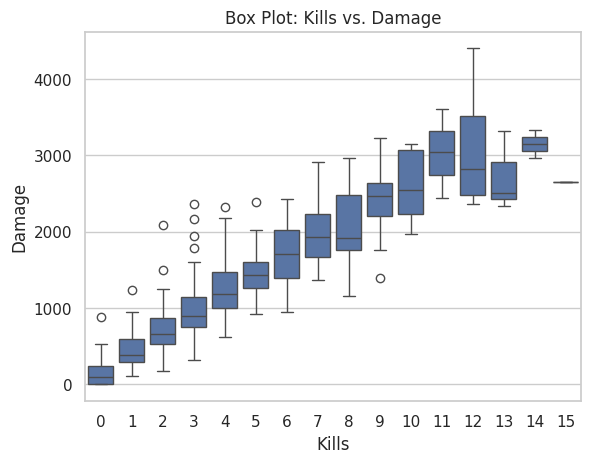

In [ ]:
sns.set(style="whitegrid")
sns.scatterplot(x='kills', y='damage', data=df_cod)   #visualize scatter plot
sns.regplot(x='kills', y='damage', data=df_cod, scatter=False)
plt.title('Scatter Plot Kills vs. Damage')
plt.show()

sns.boxplot(x='kills', y='damage', data=df_cod)   #visualize box plot
plt.title('Box Plot: Kills vs. Damage')
plt.xlabel('Kills')
plt.ylabel('Damage')
plt.show()

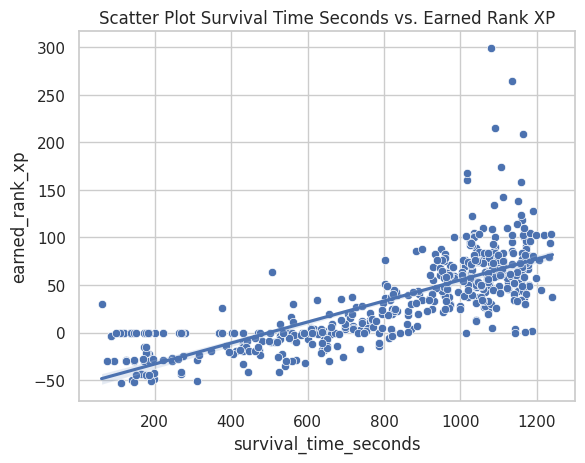

In [ ]:
sns.scatterplot(x='survival_time_seconds', y='earned_rank_xp', data=df_cod)   #visualize scatter plot
sns.regplot(x='survival_time_seconds', y='earned_rank_xp', data=df_cod, scatter=False)
plt.title('Scatter Plot Survival Time Seconds vs. Earned Rank XP')
plt.show()

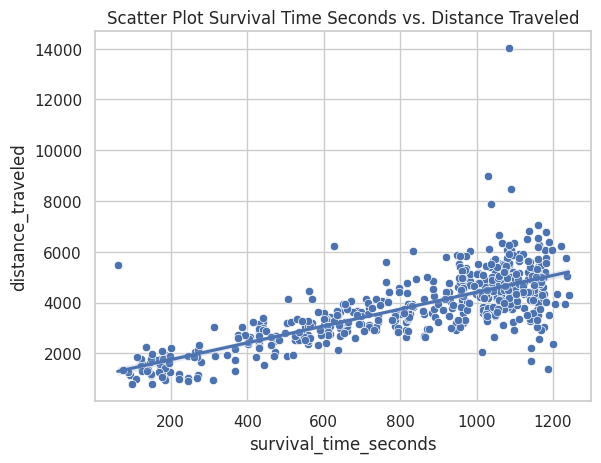

In [ ]:
sns.scatterplot(x='survival_time_seconds', y='distance_traveled', data=df_cod)   #visualize scatter plot
sns.regplot(x='survival_time_seconds', y='distance_traveled', data=df_cod, scatter=False)
plt.title('Scatter Plot Survival Time Seconds vs. Distance Traveled')
plt.show()

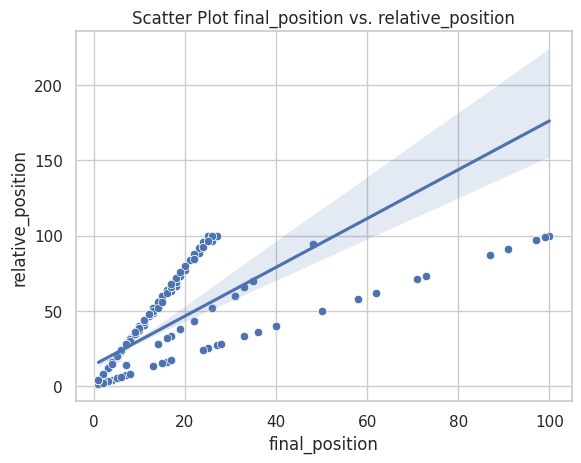

In [ ]:
sns.scatterplot(x='final_position', y='relative_position', data=df_cod)   #visualize scatter plot
sns.regplot(x='final_position', y='relative_position', data=df_cod, scatter=False)
plt.title('Scatter Plot final_position vs. relative_position')
plt.show()

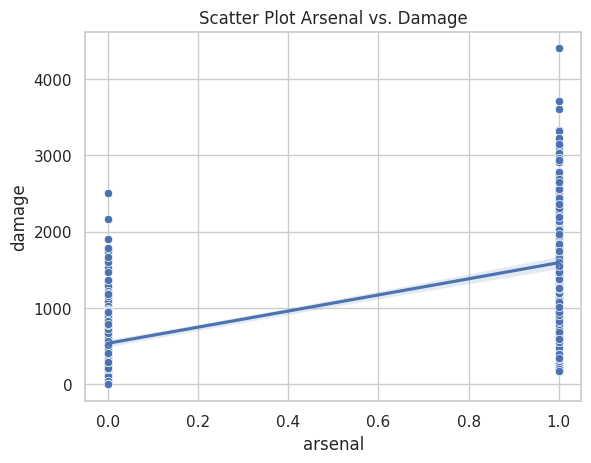

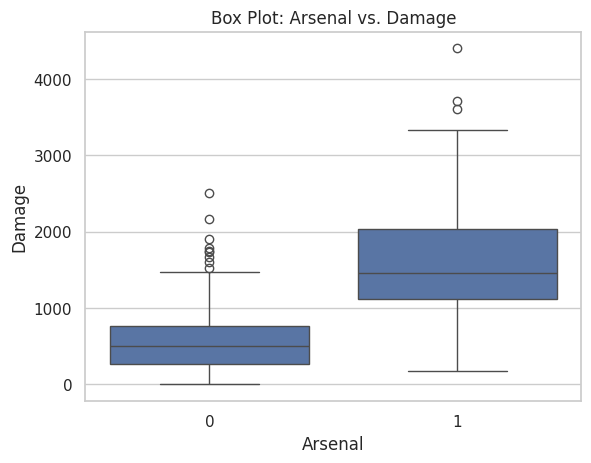

In [ ]:
sns.scatterplot(x='arsenal', y='damage', data=df_cod)   #visualize scatter plot
sns.regplot(x='arsenal', y='damage', data=df_cod, scatter=False)
plt.title('Scatter Plot Arsenal vs. Damage')
plt.show()

sns.boxplot(x='arsenal', y='damage', data=df_cod)   #visualize box plot
plt.title('Box Plot: Arsenal vs. Damage')
plt.xlabel('Arsenal')
plt.ylabel('Damage')
plt.show()

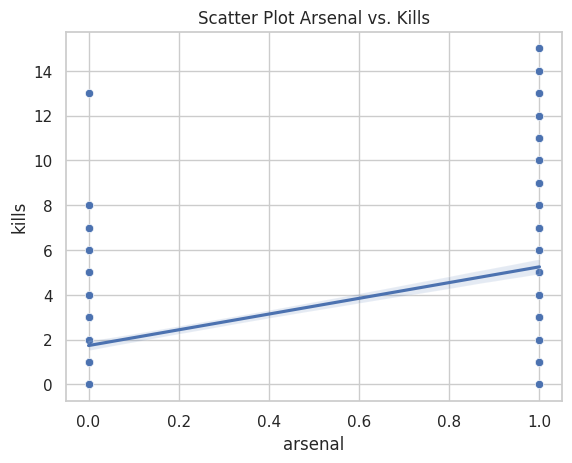

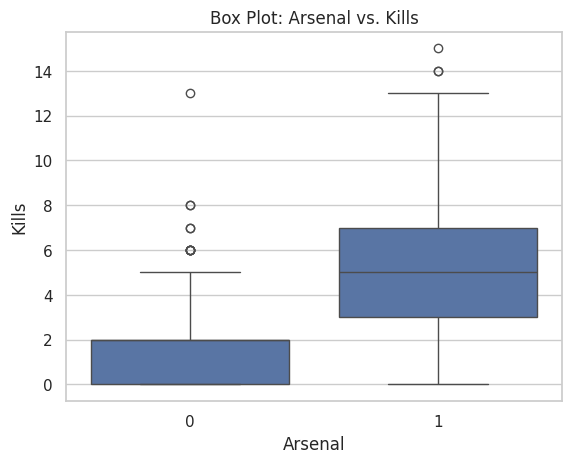

In [ ]:
sns.scatterplot(x='arsenal', y='kills', data=df_cod)   #visualize scatter plot
sns.regplot(x='arsenal', y='kills', data=df_cod, scatter=False)
plt.title('Scatter Plot Arsenal vs. Kills')
plt.show()

sns.boxplot(x='arsenal', y='kills', data=df_cod)   #visualize box plot
plt.title('Box Plot: Arsenal vs. Kills')
plt.xlabel('Arsenal')
plt.ylabel('Kills')
plt.show()

## Ploting Categorical Variables

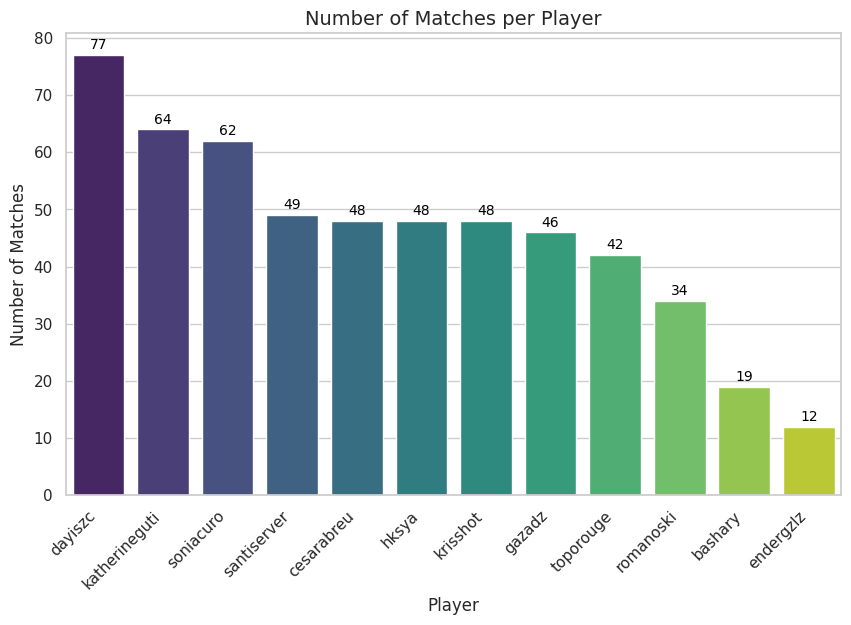

In [ ]:
user_frequencies = df_cod['user_name'].value_counts().sort_values(ascending=False)
custom_palette_user = sns.color_palette('viridis', len(user_frequencies))
plt.figure(figsize=(10, 6))
plt.title('Number of Matches per Player', fontsize=14)
sns.barplot(x=user_frequencies.index, y=user_frequencies.values, hue=user_frequencies.index, palette=custom_palette_user, legend=False)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(user_frequencies.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

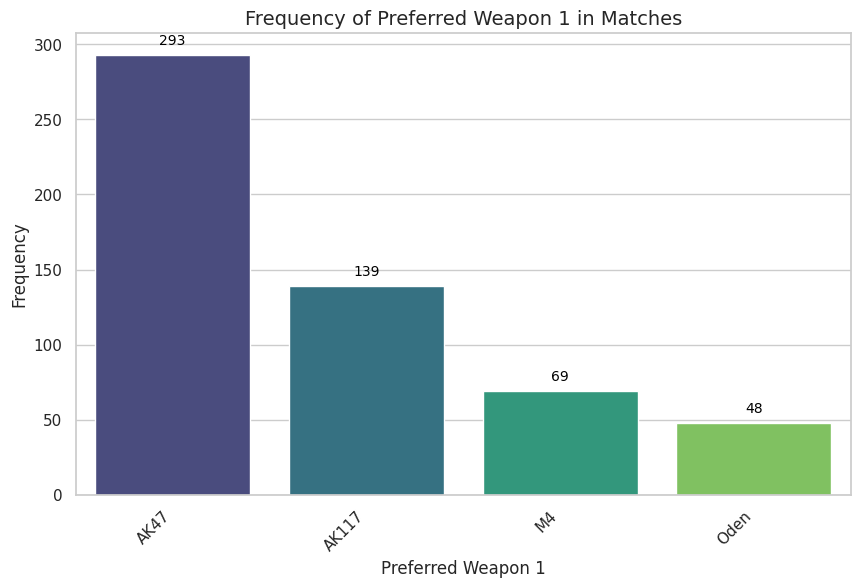

In [ ]:
weapon1_frequencies = df_cod['preferred_weapon_1'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
custom_palette_weapon1 = sns.color_palette('viridis', len(weapon1_frequencies))
sns.barplot(x=weapon1_frequencies.index, y=weapon1_frequencies.values, hue=weapon1_frequencies.index, palette=custom_palette_weapon1, legend=False)
plt.title('Frequency of Preferred Weapon 1 in Matches', fontsize=14)
plt.xlabel('Preferred Weapon 1', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(weapon1_frequencies.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

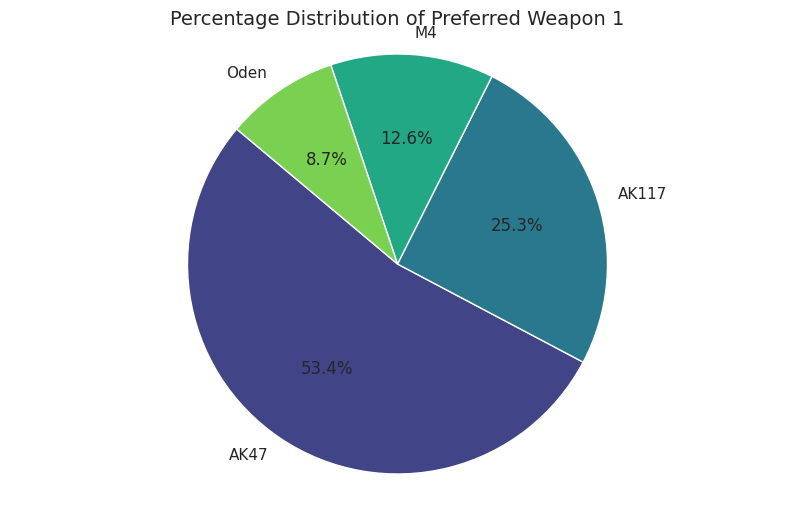

In [ ]:
weapon1_frequencies = df_cod['preferred_weapon_1'].value_counts().sort_values(ascending=False)
custom_palette_weapon1 = sns.color_palette('viridis', len(weapon1_frequencies))
plt.figure(figsize=(10, 6))
plt.title('Percentage Distribution of Preferred Weapon 1', fontsize=14)
plt.pie(weapon1_frequencies.values, labels=weapon1_frequencies.index, colors=custom_palette_weapon1, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

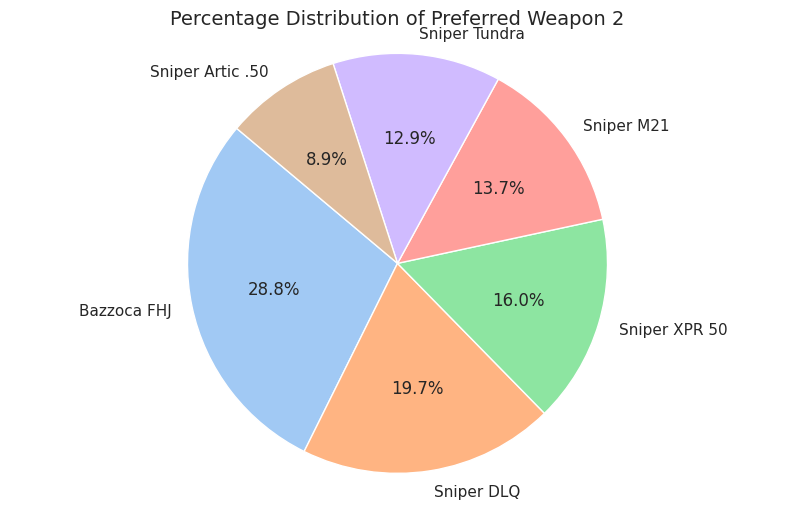

In [ ]:
weapon2_frequencies = df_cod['preferred_weapon_2'].value_counts().sort_values(ascending=False)
custom_palette_weapon2 = sns.color_palette('pastel', len(weapon2_frequencies))
plt.figure(figsize=(10, 6))
plt.title('Percentage Distribution of Preferred Weapon 2', fontsize=14)
plt.pie(weapon2_frequencies.values, labels=weapon2_frequencies.index, colors=custom_palette_weapon2, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Asegurar que el gráfico de pastel se vea como un círculo
plt.show()

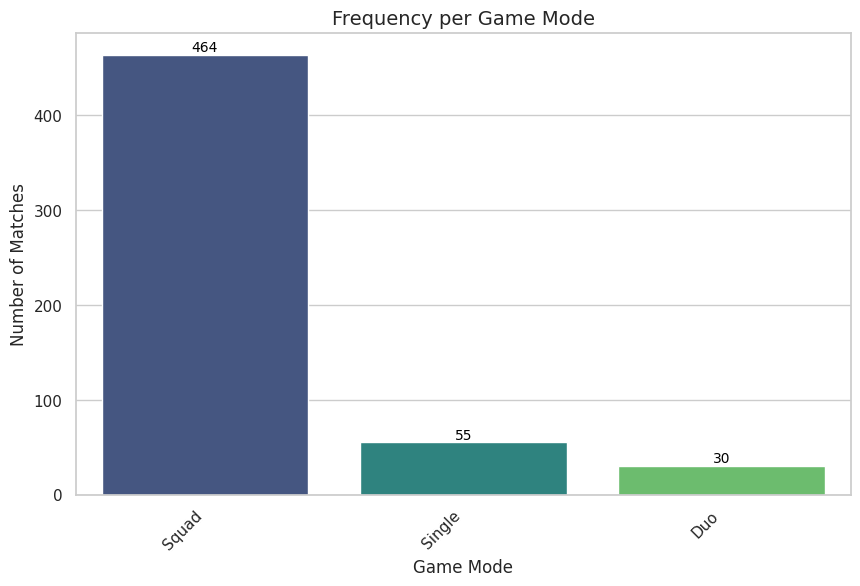

In [ ]:
mode_frequencies = df_cod['game_mode'].value_counts().sort_values(ascending=False)
custom_palette_mode = sns.color_palette('viridis', len(mode_frequencies))
plt.figure(figsize=(10, 6))
plt.title('Frequency per Game Mode', fontsize=14)
sns.barplot(x=mode_frequencies.index, y=mode_frequencies.values, hue=mode_frequencies.index, palette=custom_palette_mode, legend=False)
plt.xlabel('Game Mode', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(mode_frequencies.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

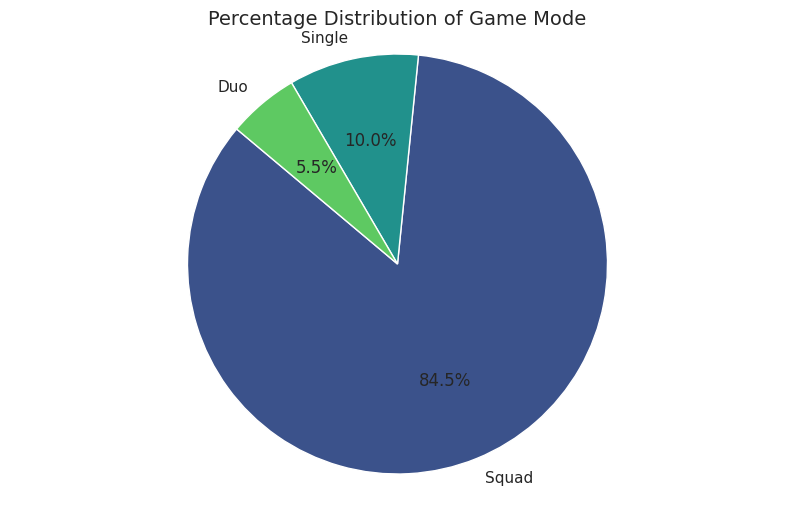

In [ ]:
mode_frequencies = df_cod['game_mode'].value_counts().sort_values(ascending=False)
custom_palette_mode = sns.color_palette('viridis', len(mode_frequencies))
plt.figure(figsize=(10, 6))
plt.title('Percentage Distribution of Game Mode', fontsize=14)
plt.pie(mode_frequencies.values, labels=mode_frequencies.index, colors=custom_palette_mode, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

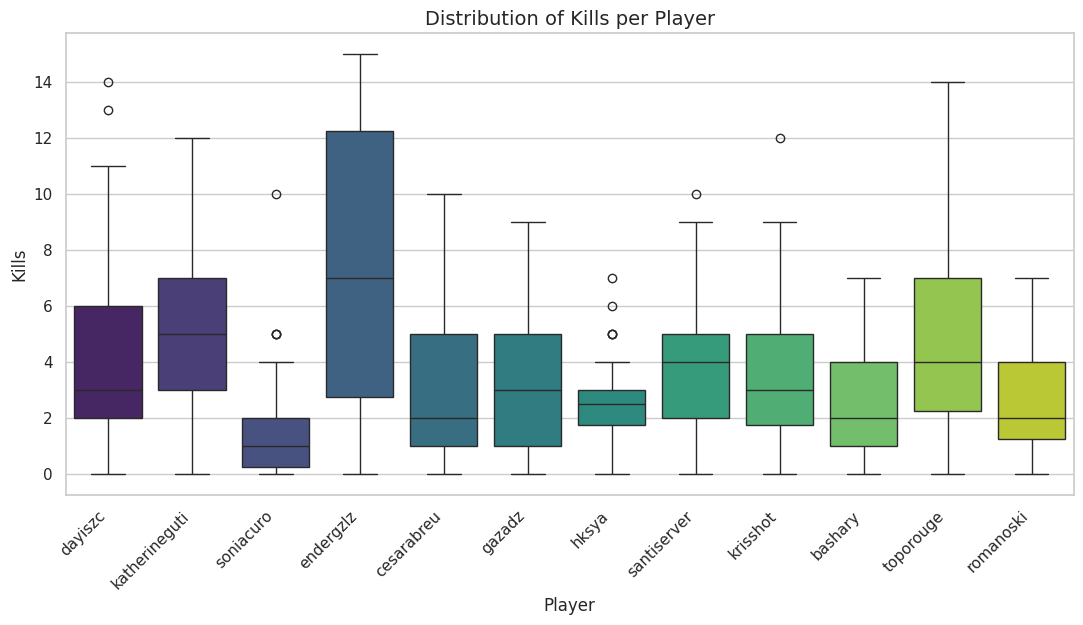

In [ ]:
num_categories = len(df_cod['user_name'].unique())
palette = sns.color_palette('viridis', num_categories)
plt.figure(figsize=(13, 6))
sns.boxplot(x='user_name', y='kills', data=df_cod, hue='user_name', palette=palette, legend=False)
plt.title('Distribution of Kills per Player', fontsize=14)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Kills', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

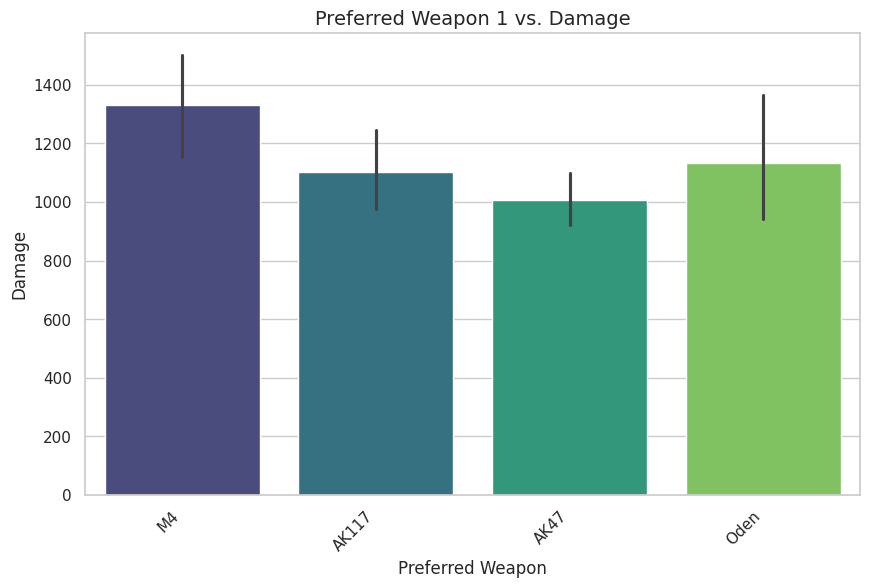

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='preferred_weapon_1', y='damage', hue='preferred_weapon_1', data=df_cod, palette='viridis', dodge=False)
plt.title('Preferred Weapon 1 vs. Damage', fontsize=14)
plt.xlabel('Preferred Weapon', fontsize=12)
plt.ylabel('Damage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend([], frameon=False)
plt.show()

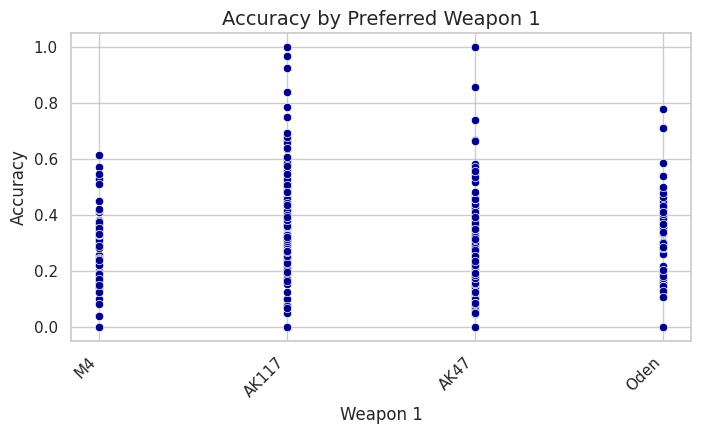

<ipython-input-42-65493ea69961>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preferred_weapon_1', y='accuracy', data=df_cod, palette='viridis')


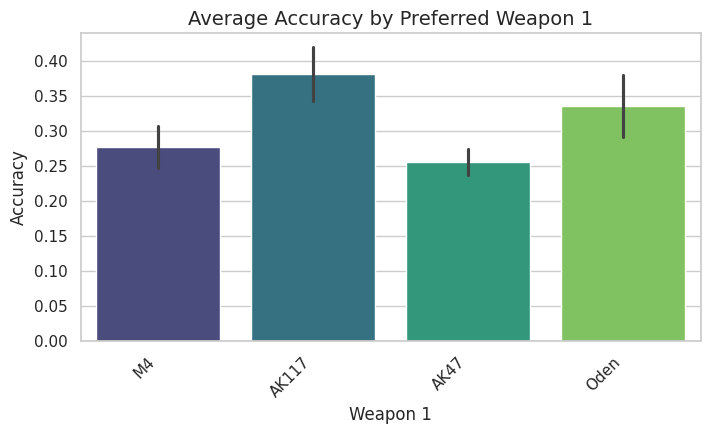

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='preferred_weapon_1', y='accuracy', data=df_cod, color='darkblue')
plt.title('Accuracy by Preferred Weapon 1', fontsize=14)
plt.xlabel('Weapon 1')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 4))   #average accuracy per weapon
sns.barplot(x='preferred_weapon_1', y='accuracy', data=df_cod, palette='viridis')
plt.title('Average Accuracy by Preferred Weapon 1', fontsize=14)
plt.xlabel('Weapon 1')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

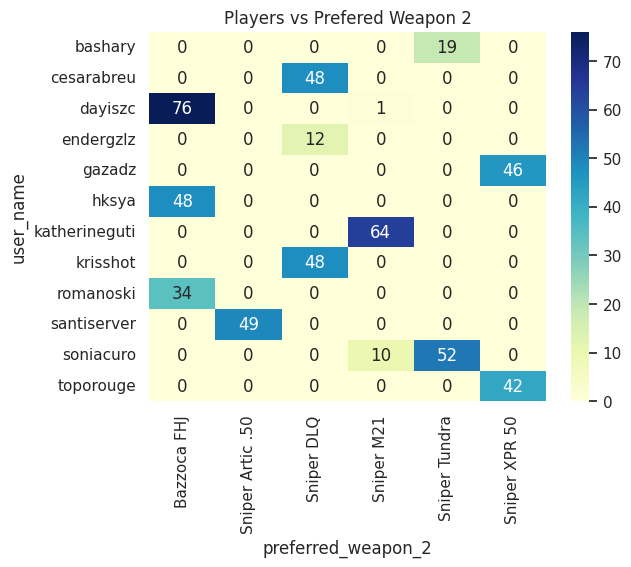

In [ ]:
cross_tab_1 = pd.crosstab(df_cod['user_name'], df_cod['preferred_weapon_2'])
sns.heatmap(cross_tab_1, annot=True, cmap='YlGnBu')
plt.title('Players vs Prefered Weapon 2')
plt.show()

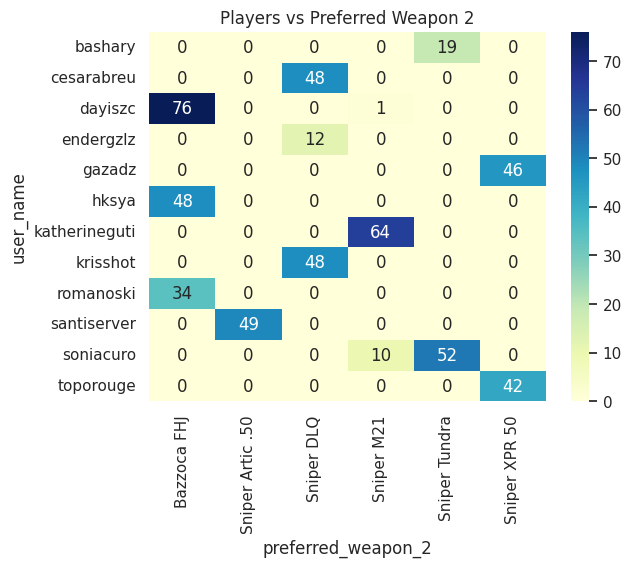

In [ ]:
cross_tab_2 = pd.crosstab(df_cod['user_name'], df_cod['preferred_weapon_2'])
sns.heatmap(cross_tab_2, annot=True, cmap='YlGnBu')
plt.title('Players vs Preferred Weapon 2')
plt.show()

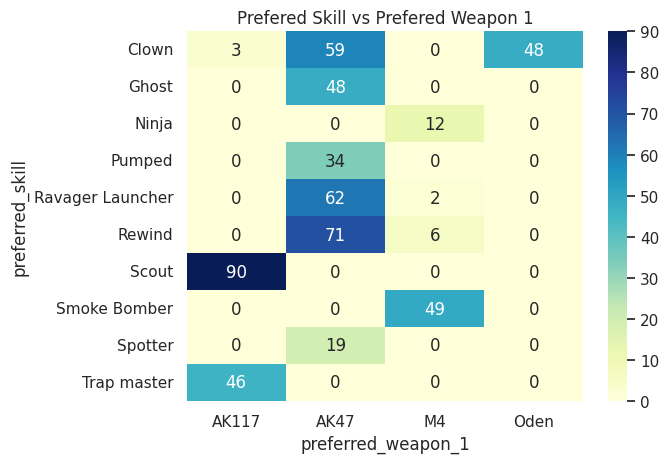

In [ ]:
cross_tab_3 = pd.crosstab(df_cod['preferred_skill'], df_cod['preferred_weapon_1'])
sns.heatmap(cross_tab_3, annot=True, cmap='YlGnBu')
plt.title('Prefered Skill vs Prefered Weapon 1')
plt.show()

## Machine Learning Process

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data= df_cod

In [ ]:
data

,user_name,date,game_mode,kills,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,preferred_weapon_2,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position
0,dayiszc,2024-04-20,Squad,3,839,929.0,0,4422,1,Rewind,M4,Bazzoca FHJ,1,0.257,0.000,55,12896,1,1,1,26,3.846154
1,dayiszc,2024-04-20,Squad,3,585,863.0,0,4147,4,Rewind,M4,Bazzoca FHJ,1,0.243,0.000,18,9563,0,0,6,26,23.076923
2,dayiszc,2024-04-20,Single,9,1765,1164.0,0,4296,4,Rewind,M4,Bazzoca FHJ,1,0.361,0.111,76,13969,0,1,1,100,1.000000
3,dayiszc,2024-04-21,Single,6,1250,1025.0,0,3512,2,Rewind,M4,Bazzoca FHJ,1,0.448,0.000,57,13223,0,0,2,100,2.000000
4,dayiszc,2024-04-22,Single,6,1365,833.0,0,3819,1,Rewind,M4,Bazzoca FHJ,0,0.297,0.167,23,2356,0,0,16,100,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,romanoski,2024-05-02,Squad,4,1476,1155.0,1,5002,4,Pumped,AK47,Bazzoca FHJ,1,0.173,0.000,73,6716,0,1,1,26,3.846154
545,romanoski,2024-05-02,Squad,2,794,1147.0,3,4118,6,Pumped,AK47,Bazzoca FHJ,0,0.235,1.000,33,6380,0,0,2,26,7.692308
546,romanoski,2024-05-02,Squad,5,1266,1086.0,0,6259,3,Pumped,AK47,Bazzoca FHJ,1,0.186,0.400,73,6490,0,1,1,25,4.000000
547,romanoski,2024-05-02,Squad,6,1547,1038.0,3,5530,10,Pumped,AK47,Bazzoca FHJ,1,0.192,0.000,76,6361,0,1,1,25,4.000000


In [ ]:
pip install --pre pycaret

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import pandas as pd   #loading dataframe to work with pycaret library
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/final_cod_mobile.csv'
dataset = pd.read_csv(file_path)

print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  user_name        date game_mode  kills  damage  survival_time_seconds  \
0   dayiszc  2024-04-20     Squad      3     839                  929.0   
1   dayiszc  2024-04-20     Squad      3     585                  863.0   
2   dayiszc  2024-04-20    Single      9    1765                 1164.0   
3   dayiszc  2024-04-21    Single      6    1250                 1025.0   
4   dayiszc  2024-04-22    Single      6    1365                  833.0   

   rescue  distance_traveled  skill_uses preferred_skill  ... arsenal  \
0       0               4422           1          Rewind  ...       1   
1       0               4147           4          Rewind  ...       1   
2       0               4296           4          Rewind  ...       1   
3       0               3512           2          Rewind  ...       1   
4       0               3819           1          Rewin

In [ ]:
from pycaret.regression import * #Setting up and preprocessing specific data before training regression models
exp = setup(data=dataset, target='kills')

,Description,Value
0,Session id,385
1,Target,kills
2,Target type,Regression
3,Original data shape,"(549, 22)"
4,Transformed data shape,"(549, 70)"
5,Transformed train set shape,"(384, 70)"
6,Transformed test set shape,"(165, 70)"
7,Numeric features,15
8,Categorical features,6
9,Preprocess,True


In [ ]:
# Comparar modelos para el primer objetivo (kills)
best_model_kills = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.8206,1.3067,1.1181,0.8455,0.2858,0.2965,0.1610
br,Bayesian Ridge,0.8217,1.3112,1.1200,0.8448,0.2870,0.2973,0.1570
huber,Huber Regressor,0.8343,1.3169,1.1224,0.8440,0.2941,0.3014,0.1920
lasso,Lasso Regression,0.8256,1.3294,1.1269,0.8427,0.2890,0.2974,0.1570
llar,Lasso Least Angle Regression,0.8256,1.3294,1.1269,0.8427,0.2890,0.2974,0.2350
lightgbm,Light Gradient Boosting Machine,0.8537,1.3538,1.1500,0.8378,0.2876,0.3218,0.4120
omp,Orthogonal Matching Pursuit,0.8457,1.3739,1.1476,0.8371,0.3021,0.3050,0.1560
gbr,Gradient Boosting Regressor,0.8664,1.3992,1.1711,0.8315,0.2791,0.3067,0.3050
ridge,Ridge Regression,0.8694,1.4266,1.1719,0.8306,0.3058,0.3121,0.1530
lr,Linear Regression,0.8830,1.4678,1.1889,0.8264,0.3085,0.3224,0.9280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
en_model = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0915,2.1784,1.4759,0.8382,0.3491,0.4176
1,0.7195,0.9179,0.9581,0.8900,0.3176,0.1942
2,0.7254,0.8325,0.9124,0.8740,0.2845,0.2848
3,0.5352,0.4595,0.6779,0.9371,0.2152,0.2553
4,0.7911,1.0663,1.0326,0.8949,0.2211,0.2540
5,0.9020,1.7911,1.3383,0.8362,0.2656,0.2806
6,0.7760,1.2977,1.1392,0.7768,0.2785,0.3018
7,0.7987,1.0653,1.0321,0.8572,0.2890,0.2704
8,0.9181,2.1017,1.4497,0.7284,0.3080,0.3417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

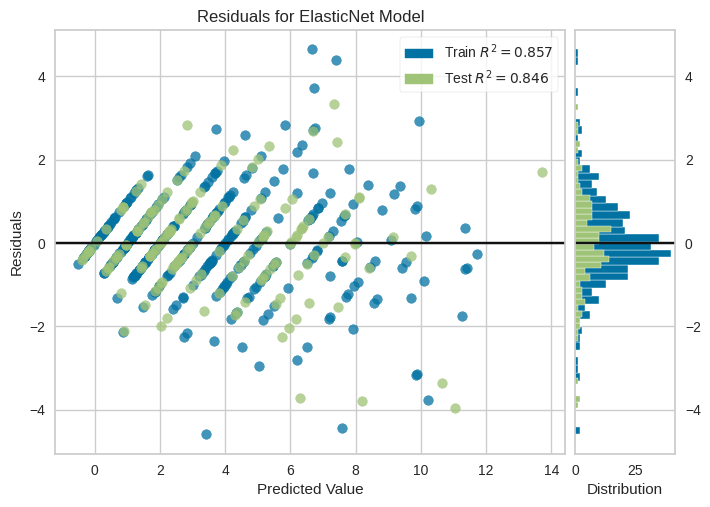

In [ ]:
from pycaret.regression import compare_models, finalize_model, plot_model
plot_model(best_model_kills)

In [ ]:
predictions_en = predict_model(en_model, data= df_cod)
predictions_en

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.8060,1.2556,1.1205,0.8540,0.2824,0.2882


,user_name,date,game_mode,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,...,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position,kills,prediction_label
0,dayiszc,2024-04-20,Squad,839,929.0,0,4422,1,Rewind,M4,...,0.000,55,12896,1,1,1,26,3.846154,3,2.913171
1,dayiszc,2024-04-20,Squad,585,863.0,0,4147,4,Rewind,M4,...,0.000,18,9563,0,0,6,26,23.076923,3,1.833819
2,dayiszc,2024-04-20,Single,1765,1164.0,0,4296,4,Rewind,M4,...,0.111,76,13969,0,1,1,100,1.000000,9,7.778297
3,dayiszc,2024-04-21,Single,1250,1025.0,0,3512,2,Rewind,M4,...,0.000,57,13223,0,0,2,100,2.000000,6,6.156495
4,dayiszc,2024-04-22,Single,1365,833.0,0,3819,1,Rewind,M4,...,0.167,23,2356,0,0,16,100,16.000000,6,5.988334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,romanoski,2024-05-02,Squad,1476,1155.0,1,5002,4,Pumped,AK47,...,0.000,73,6716,0,1,1,26,3.846154,4,4.620316
545,romanoski,2024-05-02,Squad,794,1147.0,3,4118,6,Pumped,AK47,...,1.000,33,6380,0,0,2,26,7.692307,2,2.277968
546,romanoski,2024-05-02,Squad,1266,1086.0,0,6259,3,Pumped,AK47,...,0.400,73,6490,0,1,1,25,4.000000,5,4.070095
547,romanoski,2024-05-02,Squad,1547,1038.0,3,5530,10,Pumped,AK47,...,0.000,76,6361,0,1,1,25,4.000000,6,4.959441


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_kills = df_cod[['damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups', 'relative_position']]
y_kills = df_cod['kills']

X_train_kills, X_test_kills, y_train_kills, y_test_kills = train_test_split(X_kills, y_kills, test_size=0.2, random_state=42)

numerical_cols_kills = ['damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups', 'relative_position']

categorical_cols = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols_kills),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

model_kills = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model_kills.fit(X_train_kills, y_train_kills)

y_pred_kills = model_kills.predict(X_test_kills)

r2_kills = r2_score(y_test_kills, y_pred_kills)
mse_kills = mean_squared_error(y_test_kills, y_pred_kills)
rmse_kills = np.sqrt(mse_kills)
mae_kills = mean_absolute_error(y_test_kills, y_pred_kills)

print(f'R2 Score Kills: {r2_kills}')
print(f'Mean Squared Error Kills (MSE): {mse_kills}')
print(f'Root Mean Squared Error Kills (RMSE): {rmse_kills}')
print(f'Mean Absolute Error Kills (MAE): {mae_kills}')

R2 Score Kills: 0.8354084571085123
Mean Squared Error Kills (MSE): 1.2919755986639256
Root Mean Squared Error Kills (RMSE): 1.136651045248244
Mean Absolute Error Kills (MAE): 0.8096132911122931


In [ ]:
variables_vs_kills = ['damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups', 'relative_position']
model_kills = LinearRegression()
model_kills.fit(X_train_kills[variables_vs_kills], y_train_kills)
y_pred_kills = model_kills.predict(X_test_kills[variables_vs_kills])
r2_kills = r2_score(y_test_kills, y_pred_kills)
rmse_kills = np.sqrt(mean_squared_error(y_test_kills, y_pred_kills))

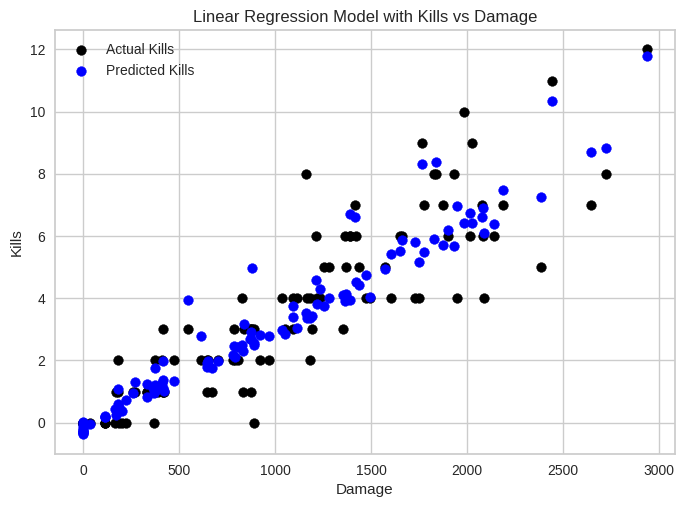

In [ ]:
plt.scatter(X_test_kills['damage'], y_test_kills, color='black', label='Actual Kills')
y_pred = model_kills.predict(X_test_kills[variables_vs_kills])
plt.scatter(X_test_kills['damage'], y_pred, color='blue', label='Predicted Kills')
plt.xlabel('Damage')
plt.ylabel('Kills')
plt.title('Linear Regression Model with Kills vs Damage')
plt.legend()
plt.show()

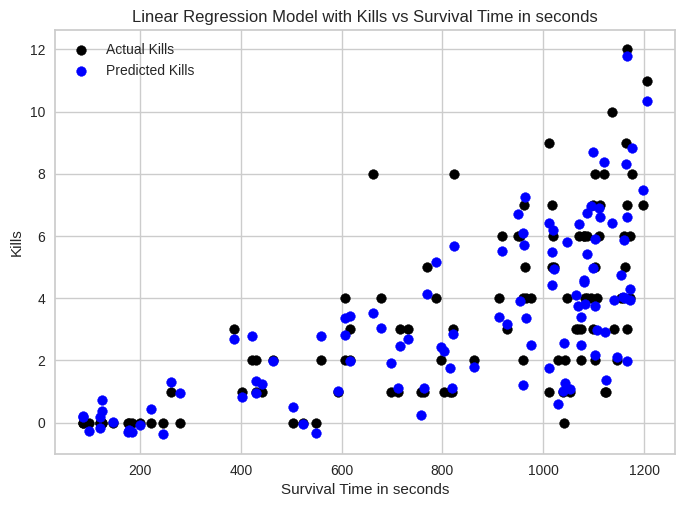

In [ ]:
plt.scatter(X_test_kills['survival_time_seconds'], y_test_kills, color='black', label='Actual Kills')
y_pred = model_kills.predict(X_test_kills[variables_vs_kills])
plt.scatter(X_test_kills['survival_time_seconds'], y_pred, color='blue', label='Predicted Kills')
plt.xlabel('Survival Time in seconds')
plt.ylabel('Kills')
plt.title('Linear Regression Model with Kills vs Survival Time in seconds')
plt.legend()
plt.show()

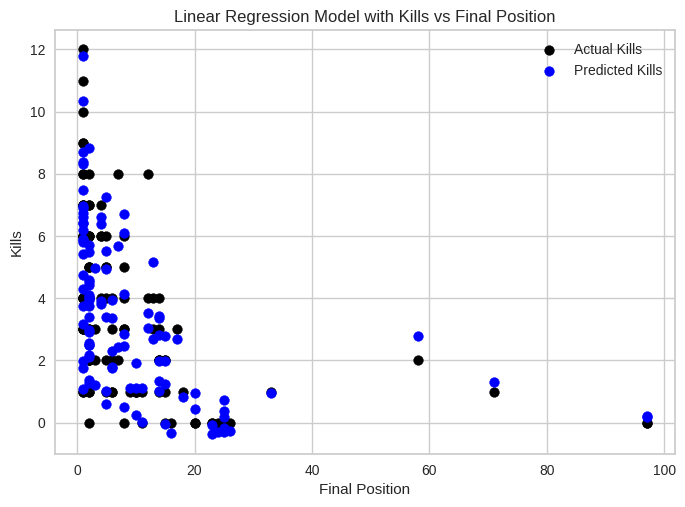

In [ ]:
plt.scatter(X_test_kills['final_position'], y_test_kills, color='black', label='Actual Kills')
y_pred = model_kills.predict(X_test_kills[variables_vs_kills])
plt.scatter(X_test_kills['final_position'], y_pred, color='blue', label='Predicted Kills')
plt.xlabel('Final Position')
plt.ylabel('Kills')
plt.title('Linear Regression Model with Kills vs Final Position')
plt.legend()
plt.show()

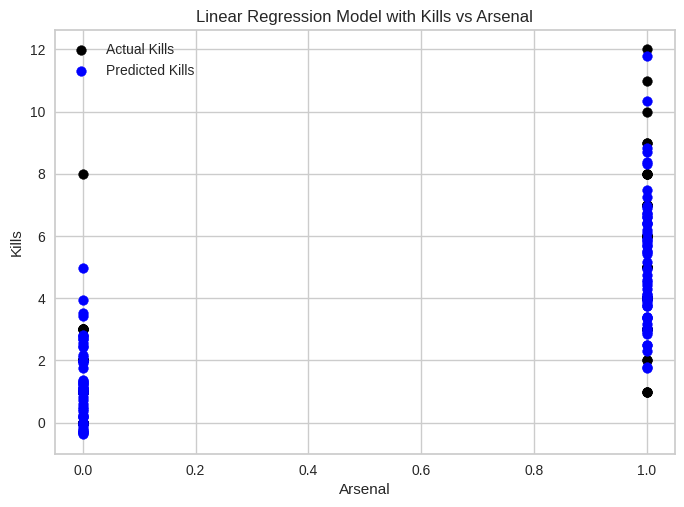

In [ ]:
plt.scatter(X_test_kills['arsenal'], y_test_kills, color='black', label='Actual Kills')
y_pred = model_kills.predict(X_test_kills[variables_vs_kills])
plt.scatter(X_test_kills['arsenal'], y_pred, color='blue', label='Predicted Kills')
plt.xlabel('Arsenal')
plt.ylabel('Kills')
plt.title('Linear Regression Model with Kills vs Arsenal')
plt.legend()
plt.show()

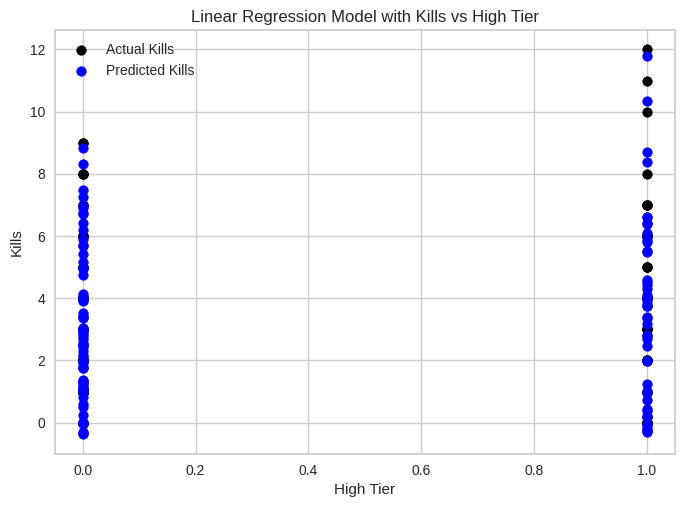

In [ ]:
plt.scatter(X_test_kills['high_tier'], y_test_kills, color='black', label='Actual Kills')
y_pred = model_kills.predict(X_test_kills[variables_vs_kills])
plt.scatter(X_test_kills['high_tier'], y_pred, color='blue', label='Predicted Kills')
plt.xlabel('High Tier')
plt.ylabel('Kills')
plt.title('Linear Regression Model with Kills vs High Tier')
plt.legend()
plt.show()

In [ ]:
from pycaret.regression import * #Setting up and preprocessing specific data before training regression models
exp_position = setup(data=dataset, target='relative_position')

,Description,Value
0,Session id,8008
1,Target,relative_position
2,Target type,Regression
3,Original data shape,"(549, 22)"
4,Transformed data shape,"(549, 70)"
5,Transformed train set shape,"(384, 70)"
6,Transformed test set shape,"(165, 70)"
7,Numeric features,15
8,Categorical features,6
9,Preprocess,True


In [ ]:
best_model_position = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.6411,12.4207,3.2690,0.9840,0.1138,0.0909,0.4140
lightgbm,Light Gradient Boosting Machine,1.7682,15.6297,3.4912,0.9791,0.1480,0.1095,0.8070
rf,Random Forest Regressor,1.6570,15.9445,3.6200,0.9788,0.1015,0.0594,0.5910
xgboost,Extreme Gradient Boosting,1.5813,20.7998,4.2443,0.9749,0.0966,0.0516,0.3340
et,Extra Trees Regressor,1.9676,21.1066,4.2696,0.9721,0.1237,0.0732,0.4270
dt,Decision Tree Regressor,1.9051,32.0419,5.1708,0.9639,0.1170,0.0475,0.2210
ada,AdaBoost Regressor,3.9753,29.6344,5.2996,0.9611,0.4001,0.5128,0.3580
en,Elastic Net,6.1555,76.4073,8.4343,0.8957,0.5341,0.8208,0.1610
llar,Lasso Least Angle Regression,6.1959,77.3281,8.4836,0.8943,0.5417,0.8307,0.2660
lasso,Lasso Regression,6.1959,77.3275,8.4835,0.8943,0.5418,0.8307,0.1570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

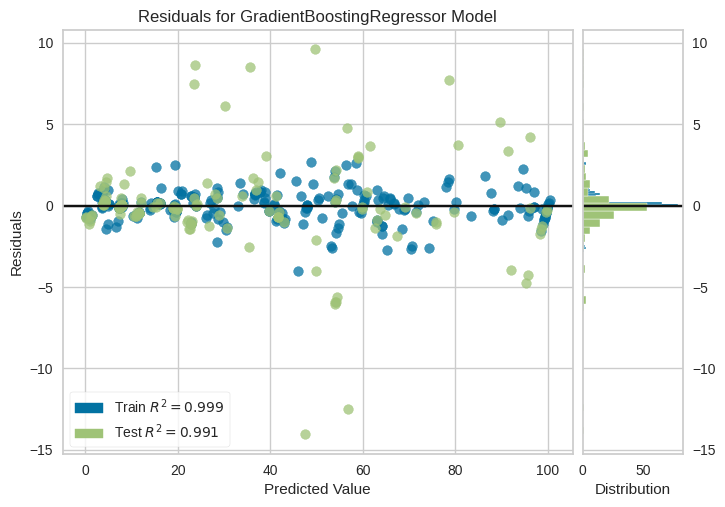

In [ ]:
plot_model(best_model_position)

In [ ]:
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1274,21.3949,4.6255,0.9736,0.1866,0.1629
1,2.6189,39.9235,6.3185,0.9421,0.1138,0.0699
2,1.3462,7.5340,2.7448,0.9862,0.1641,0.1629
3,1.0688,4.6760,2.1624,0.9953,0.0771,0.0548
4,1.5728,9.2999,3.0496,0.9845,0.1176,0.0778
5,1.6651,8.3375,2.8875,0.9924,0.0973,0.0677
6,2.1788,15.0965,3.8854,0.9875,0.1295,0.1014
7,1.1718,4.2766,2.0680,0.9939,0.1264,0.1104
8,1.7007,11.0116,3.3184,0.9876,0.0728,0.0560


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions_gbr = predict_model(gbr_model, data= df_cod)
predictions_gbr

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.8131,2.9767,1.7253,0.9965,0.0865,0.0558


,user_name,date,game_mode,kills,damage,survival_time_seconds,rescue,distance_traveled,skill_uses,preferred_skill,...,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position,prediction_label
0,dayiszc,2024-04-20,Squad,3,839,929.0,0,4422,1,Rewind,...,0.257,0.000,55,12896,1,1,1,26,3.846154,3.985356
1,dayiszc,2024-04-20,Squad,3,585,863.0,0,4147,4,Rewind,...,0.243,0.000,18,9563,0,0,6,26,23.076923,23.558951
2,dayiszc,2024-04-20,Single,9,1765,1164.0,0,4296,4,Rewind,...,0.361,0.111,76,13969,0,1,1,100,1.000000,0.205227
3,dayiszc,2024-04-21,Single,6,1250,1025.0,0,3512,2,Rewind,...,0.448,0.000,57,13223,0,0,2,100,2.000000,2.788656
4,dayiszc,2024-04-22,Single,6,1365,833.0,0,3819,1,Rewind,...,0.297,0.167,23,2356,0,0,16,100,16.000000,23.482891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,romanoski,2024-05-02,Squad,4,1476,1155.0,1,5002,4,Pumped,...,0.173,0.000,73,6716,0,1,1,26,3.846154,3.929641
545,romanoski,2024-05-02,Squad,2,794,1147.0,3,4118,6,Pumped,...,0.235,1.000,33,6380,0,0,2,26,7.692307,7.656504
546,romanoski,2024-05-02,Squad,5,1266,1086.0,0,6259,3,Pumped,...,0.186,0.400,73,6490,0,1,1,25,4.000000,4.234778
547,romanoski,2024-05-02,Squad,6,1547,1038.0,3,5530,10,Pumped,...,0.192,0.000,76,6361,0,1,1,25,4.000000,4.234778


In [ ]:
X_position = df_cod[['kills', 'damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups']]
y_position = df_cod['relative_position']

X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(X_position, y_position, test_size=0.2, random_state=42)

numerical_cols_position = ['kills', 'damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups']

categorical_cols_position = []

preprocessor_position = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols_position),
        ('cat', OneHotEncoder(), categorical_cols_position)
    ])

model_position = Pipeline(steps=[('preprocessor', preprocessor_position),
                                 ('regressor', LinearRegression())])

model_position.fit(X_train_position, y_train_position)

y_pred_position = model_position.predict(X_test_position)
r2_position = r2_score(y_test_position, y_pred_position)
mse_position = mean_squared_error(y_test_position, y_pred_position)
rmse_position = np.sqrt(mse_position)
mae_position = mean_absolute_error(y_test_position, y_pred_position)

print(f'R2 Score Position: {r2_position}')
print(f'Mean Squared Error Position (MSE): {mse_position}')
print(f'Root Mean Squared Error Position (RMSE): {rmse_position}')
print(f'Mean Absolute Error Position (MAE): {mae_position}')

R2 Score Position: 0.9303691081406317
Mean Squared Error Position (MSE): 68.04206052059592
Root Mean Squared Error Position (RMSE): 8.248761150657469
Mean Absolute Error Position (MAE): 6.382532263860685


In [ ]:
variables_vs_position = ['kills', 'damage', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups']
model_position = LinearRegression()
model_position.fit(X_train_position[variables_vs_position], y_train_position)
y_pred_position = model_position.predict(X_test_position[variables_vs_position])
r2_position = r2_score(y_test_position, y_pred_position)
rmse_position = np.sqrt(mean_squared_error(y_test_position, y_pred_position))

# Imprimir métricas para 'position'
print(f'R2 Score Position: {r2_position}')
print(f'Root Mean Squared Error Position (RMSE): {rmse_position}')

R2 Score Position: 0.9303691081406317
Root Mean Squared Error Position (RMSE): 8.248761150657469


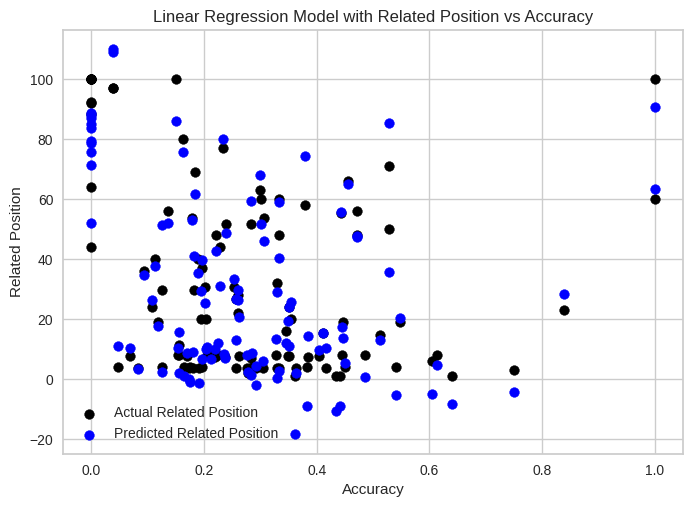

In [ ]:
plt.scatter(X_test_position['accuracy'], y_test_position, color='black', label='Actual Related Position')
y_pred_position = model_position.predict(X_test_position[variables_vs_position])
plt.scatter(X_test_position['accuracy'], y_pred_position, color='blue', label='Predicted Related Position')
plt.xlabel('Accuracy')
plt.ylabel('Related Position')
plt.title('Linear Regression Model with Related Position vs Accuracy')
plt.legend()
plt.show()

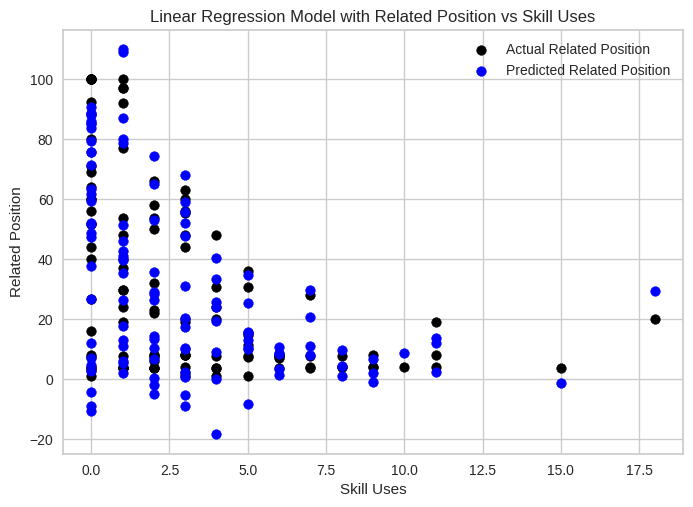

In [ ]:
plt.scatter(X_test_position['skill_uses'], y_test_position, color='black', label='Actual Related Position')
y_pred_position = model_position.predict(X_test_position[variables_vs_position])
plt.scatter(X_test_position['skill_uses'], y_pred_position, color='blue', label='Predicted Related Position')
plt.xlabel('Skill Uses')
plt.ylabel('Related Position')
plt.title('Linear Regression Model with Related Position vs Skill Uses')
plt.legend()
plt.show()

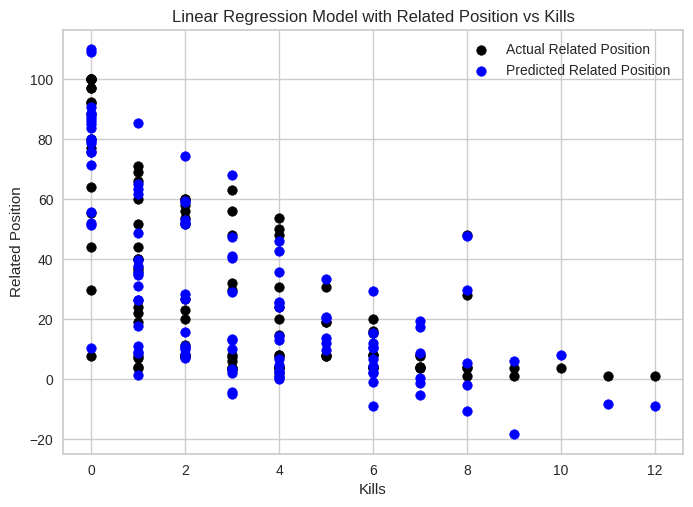

In [ ]:
plt.scatter(X_test_position['kills'], y_test_position, color='black', label='Actual Related Position')
y_pred_position = model_position.predict(X_test_position[variables_vs_position])
plt.scatter(X_test_position['kills'], y_pred_position, color='blue', label='Predicted Related Position')
plt.xlabel('Kills')
plt.ylabel('Related Position')
plt.title('Linear Regression Model with Related Position vs Kills')
plt.legend()
plt.show()

In [ ]:
from pycaret.regression import * #Setting up and preprocessing specific data before training regression models
exp_damage = setup(data=dataset, target='damage')

,Description,Value
0,Session id,4535
1,Target,damage
2,Target type,Regression
3,Original data shape,"(549, 22)"
4,Transformed data shape,"(549, 71)"
5,Transformed train set shape,"(384, 71)"
6,Transformed test set shape,"(165, 71)"
7,Numeric features,15
8,Categorical features,6
9,Preprocess,True


In [ ]:
best_model_damage = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,215.1025,85405.7535,288.9069,0.8647,0.8642,0.3111,0.2580
lasso,Lasso Regression,218.2878,88188.4274,293.5206,0.8601,0.8755,0.3083,0.1560
ridge,Ridge Regression,221.3886,90663.0821,297.6763,0.8560,0.8875,0.3188,0.1540
gbr,Gradient Boosting Regressor,221.5267,90311.2337,297.0275,0.8537,0.7713,0.3456,0.3030
lr,Linear Regression,223.8749,92161.5277,300.2851,0.8533,0.9322,0.3241,1.1920
en,Elastic Net,228.6584,93180.4407,302.5210,0.8521,0.8742,0.3368,0.1540
et,Extra Trees Regressor,230.0675,97037.9272,308.3277,0.8433,0.7136,0.3398,0.9740
omp,Orthogonal Matching Pursuit,236.1274,98316.6675,311.5902,0.8427,0.9323,0.3681,0.1550
rf,Random Forest Regressor,228.5020,100696.1442,313.9431,0.8373,0.7236,0.3555,0.6890
xgboost,Extreme Gradient Boosting,235.0025,100524.3089,313.0966,0.8362,0.7038,0.3502,0.3430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

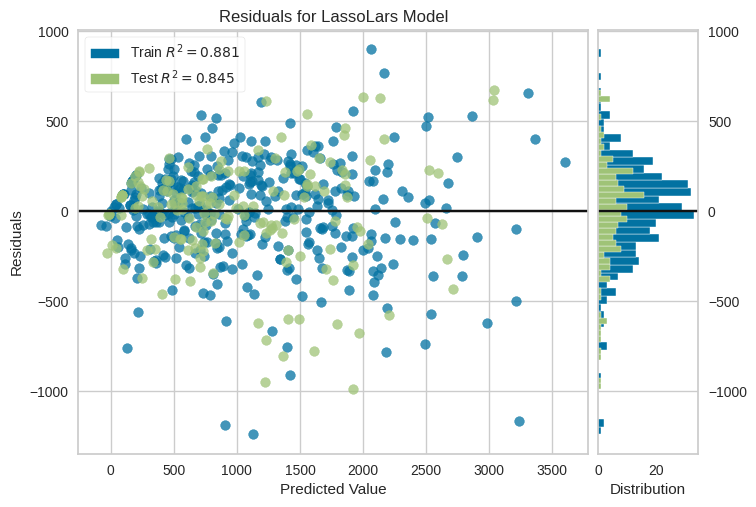

In [ ]:
plot_model(best_model_damage)

In [ ]:
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,204.3811,63440.8076,251.8746,0.8895,0.4059,0.3561
1,240.7487,145717.0314,381.7290,0.7961,1.4965,0.4173
2,225.3687,87555.1892,295.8973,0.8617,1.7577,0.2564
3,199.4197,64746.4873,254.4533,0.8882,0.4831,0.2525
4,195.0775,73386.9548,270.9003,0.8782,0.9873,0.2112
5,266.2479,129069.3037,359.2622,0.8643,0.9259,0.3082
6,185.5884,66890.4497,258.6319,0.8721,0.6075,0.2869
7,191.8629,73900.8377,271.8471,0.8498,0.3215,0.2523
8,202.8268,61762.0590,248.5197,0.8932,0.8660,0.2582


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions_llar = predict_model(llar_model, data= df_cod)
predictions_llar

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,210.1275,79038.1413,281.1372,0.8704,1.0699,0.3068


,user_name,date,game_mode,kills,survival_time_seconds,rescue,distance_traveled,skill_uses,preferred_skill,preferred_weapon_1,preferred_weapon_2,arsenal,accuracy,head_shot,earned_rank_xp,earned_xp,high_tier,win_loss,final_position,total_groups,relative_position,damage,prediction_label
0,dayiszc,2024-04-20,Squad,3,929.0,0,4422,1,Rewind,M4,Bazzoca FHJ,1,0.257,0.000,55,12896,1,1,1,26,3.846154,839,1120.273373
1,dayiszc,2024-04-20,Squad,3,863.0,0,4147,4,Rewind,M4,Bazzoca FHJ,1,0.243,0.000,18,9563,0,0,6,26,23.076923,585,1193.746067
2,dayiszc,2024-04-20,Single,9,1164.0,0,4296,4,Rewind,M4,Bazzoca FHJ,1,0.361,0.111,76,13969,0,1,1,100,1.000000,1765,2167.926723
3,dayiszc,2024-04-21,Single,6,1025.0,0,3512,2,Rewind,M4,Bazzoca FHJ,1,0.448,0.000,57,13223,0,0,2,100,2.000000,1250,1471.982397
4,dayiszc,2024-04-22,Single,6,833.0,0,3819,1,Rewind,M4,Bazzoca FHJ,0,0.297,0.167,23,2356,0,0,16,100,16.000000,1365,1223.914907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,romanoski,2024-05-02,Squad,4,1155.0,1,5002,4,Pumped,AK47,Bazzoca FHJ,1,0.173,0.000,73,6716,0,1,1,26,3.846154,1476,1355.686898
545,romanoski,2024-05-02,Squad,2,1147.0,3,4118,6,Pumped,AK47,Bazzoca FHJ,0,0.235,1.000,33,6380,0,0,2,26,7.692307,794,783.150781
546,romanoski,2024-05-02,Squad,5,1086.0,0,6259,3,Pumped,AK47,Bazzoca FHJ,1,0.186,0.400,73,6490,0,1,1,25,4.000000,1266,1517.858691
547,romanoski,2024-05-02,Squad,6,1038.0,3,5530,10,Pumped,AK47,Bazzoca FHJ,1,0.192,0.000,76,6361,0,1,1,25,4.000000,1547,1816.560687


In [ ]:
X_damage = df_cod[['kills', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups',  'relative_position']]
y_damage = df_cod['damage']

X_train_damage, X_test_damage, y_train_damage, y_test_damage = train_test_split(X_damage, y_damage, test_size=0.2, random_state=42)

numerical_cols_damage = ['kills', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups', 'relative_position']
categorical_cols_damage = []

preprocessor_damage = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols_damage),
        ('cat', OneHotEncoder(), categorical_cols_damage)
    ])

model_damage = Pipeline(steps=[('preprocessor', preprocessor_damage),
                               ('regressor', LinearRegression())])
model_damage.fit(X_train_damage, y_train_damage)

y_pred_damage = model_damage.predict(X_test_damage)
r2_damage = r2_score(y_test_damage, y_pred_damage)
mse_damage = mean_squared_error(y_test_damage, y_pred_damage)
rmse_damage = np.sqrt(mse_damage)
mae_damage = mean_absolute_error(y_test_damage, y_pred_damage)

print(f'R2 Score Damage: {r2_damage}')
print(f'Mean Squared Error Damage (MSE): {mse_damage}')
print(f'Root Mean Squared Error Damage (RMSE): {rmse_damage}')
print(f'Mean Absolute Error Damage (MAE): {mae_damage}')

R2 Score Damage: 0.8422153011512559
Mean Squared Error Damage (MSE): 83020.05505715172
Root Mean Squared Error Damage (RMSE): 288.1320097752968
Mean Absolute Error Damage (MAE): 219.33892680895198


In [ ]:
variables_vs_damage = ['kills', 'survival_time_seconds', 'rescue', 'distance_traveled', 'skill_uses', 'arsenal', 'accuracy', 'head_shot', 'earned_rank_xp', 'earned_xp', 'high_tier', 'win_loss', 'final_position', 'total_groups', 'relative_position']
model_damage = LinearRegression()
model_damage.fit(X_train_damage[variables_vs_damage], y_train_damage)
y_pred_damage = model_damage.predict(X_test_damage[variables_vs_damage])
r2_damage = r2_score(y_test_damage, y_pred_damage)
rmse_damage = np.sqrt(mean_squared_error(y_test_damage, y_pred_damage))

print(f'R2 Score Damage: {r2_damage}')
print(f'Root Mean Squared Error Damage (RMSE): {rmse_damage}')

R2 Score Damage: 0.8422153011512559
Root Mean Squared Error Damage (RMSE): 288.1320097752968


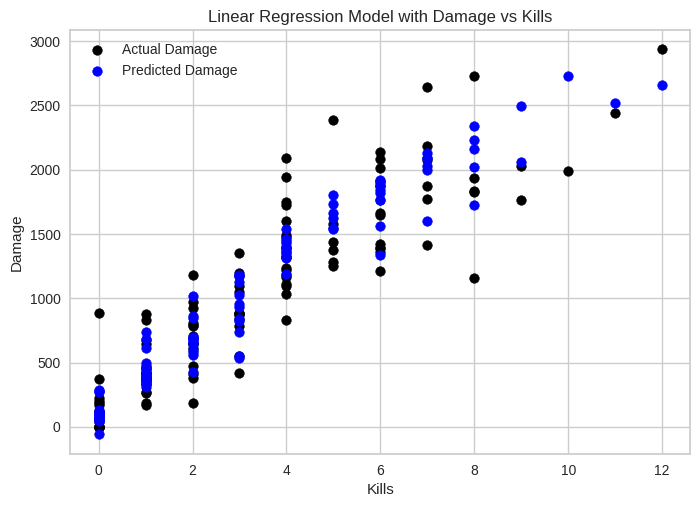

In [ ]:
plt.scatter(X_test_damage['kills'], y_test_damage, color='black', label='Actual Damage')
y_pred_damage = model_damage.predict(X_test_damage[variables_vs_damage])
plt.scatter(X_test_damage['kills'], y_pred_damage, color='blue', label='Predicted Damage')
plt.xlabel('Kills')
plt.ylabel('Damage')
plt.title('Linear Regression Model with Damage vs Kills')
plt.legend()
plt.show()

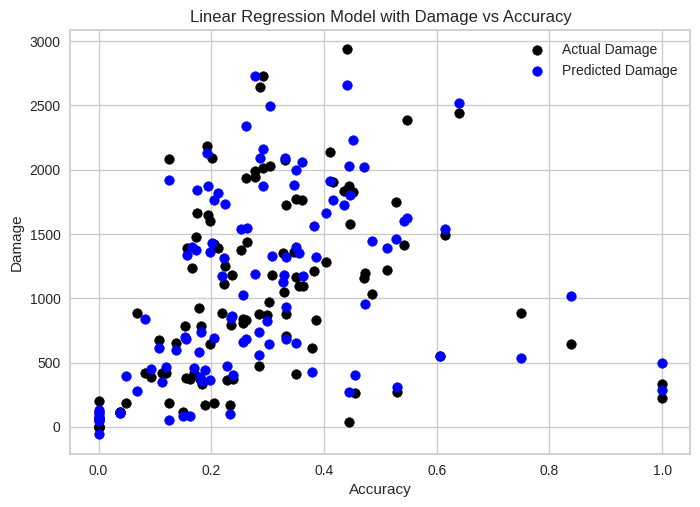

In [ ]:
plt.scatter(X_test_damage['accuracy'], y_test_damage, color='black', label='Actual Damage')
y_pred_damage = model_damage.predict(X_test_damage[variables_vs_damage])
plt.scatter(X_test_damage['accuracy'], y_pred_damage, color='blue', label='Predicted Damage')
plt.xlabel('Accuracy')
plt.ylabel('Damage')
plt.title('Linear Regression Model with Damage vs Accuracy')
plt.legend()
plt.show()

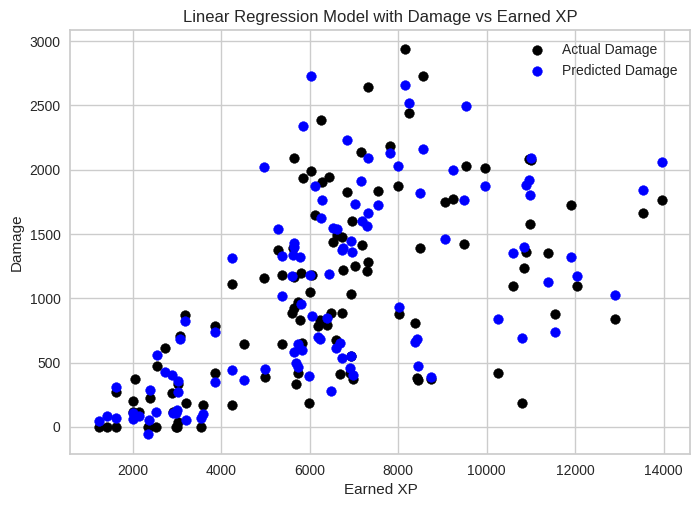

In [ ]:
plt.scatter(X_test_damage['earned_xp'], y_test_damage, color='black', label='Actual Damage')
y_pred_damage = model_damage.predict(X_test_damage[variables_vs_damage])
plt.scatter(X_test_damage['earned_xp'], y_pred_damage, color='blue', label='Predicted Damage')
plt.xlabel('Earned XP')
plt.ylabel('Damage')
plt.title('Linear Regression Model with Damage vs Earned XP')
plt.legend()
plt.show()

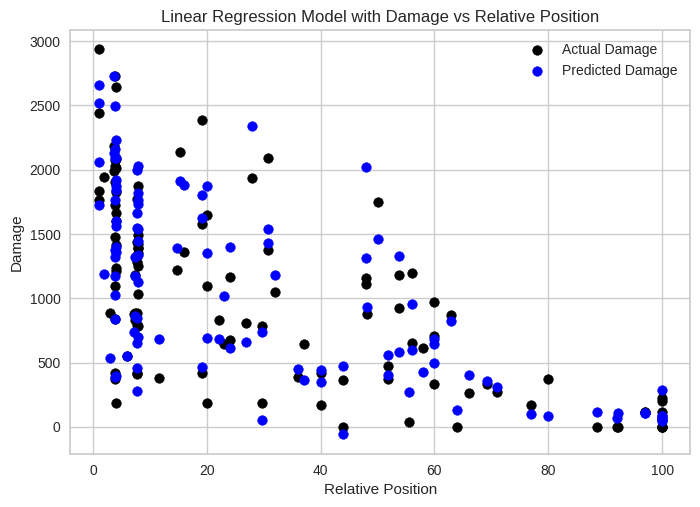

In [ ]:
plt.scatter(X_test_damage['relative_position'], y_test_damage, color='black', label='Actual Damage')
y_pred_damage = model_damage.predict(X_test_damage[variables_vs_damage])
plt.scatter(X_test_damage['relative_position'], y_pred_damage, color='blue', label='Predicted Damage')
plt.xlabel('Relative Position')
plt.ylabel('Damage')
plt.title('Linear Regression Model with Damage vs Relative Position')
plt.legend()
plt.show()
